# Contents
- [Iris dataset PCA features](#Iris-dataset-PCA-features)
- [Decision Tree on Iris PCA features](#Decision-Tree-on-Iris-PCA-features)
- [Baseline](#Baseline)
- [PCA and Kernel PCA (KPCA) Features](#PCA-and-Kernel-PCA-(KPCA)-Features)
- [UMAP Features](#UMAP-Features)
- [KMEANS Features](#KMEANS-Features)
- [Performance baseline vs baseline with PCA features](#Performance-baseline-vs-baseline-with-PCA-features)
- [Performance baseline vs baseline with Kernel PCA features](#Performance-baseline-vs-baseline-with-Kernel-PCA-features)
- [Performance baseline vs baseline with UMAP features](#Performance-baseline-vs-baseline-with-Kernel-PCA-features)
- [Performance baseline vs baseline with KMEANS features](#Performance-baseline-vs-baseline-with-KMEANS-features)
- [Plot PCA Features against target](#Plot-PCA-Features-against-target)
- [Plot Kernel PCA Features against target](#Plot-Kernel-PCA-Features-against-target)
- [Plot UMAP Features against target](#Plot-UMAP-Features-against-target)
- [Plot KMEANS Features against target](Plot-KMEANS-Features-against-target)
- [Results Dataframe](#Results-Dataframe)



In [66]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

import numpy as np
from constants import *
import matplotlib.pyplot as plt
import seaborn as sns
from constants import *
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.decomposition import PCA

# Iris dataset PCA features

taken from [sklearn docu](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html):


Text(0.5, 1.0, 'PCA of IRIS dataset')

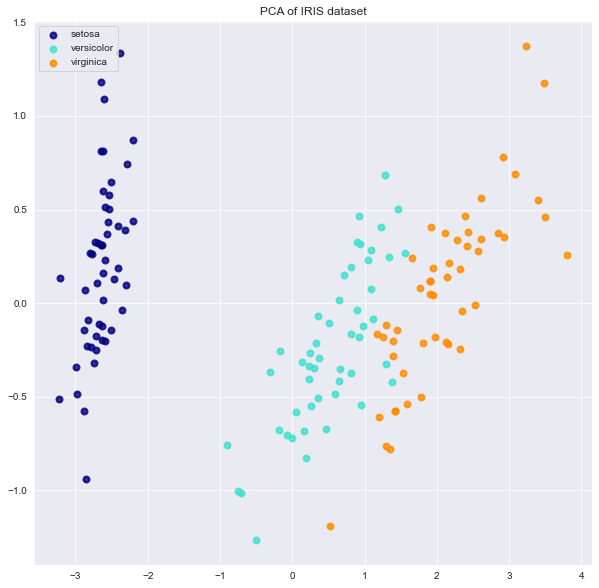

In [67]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

colors = ["navy", "turquoise", "darkorange"]
lw = 2

plt.figure(figsize=(10, 10))

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

## Decision Tree on Iris PCA features

[]

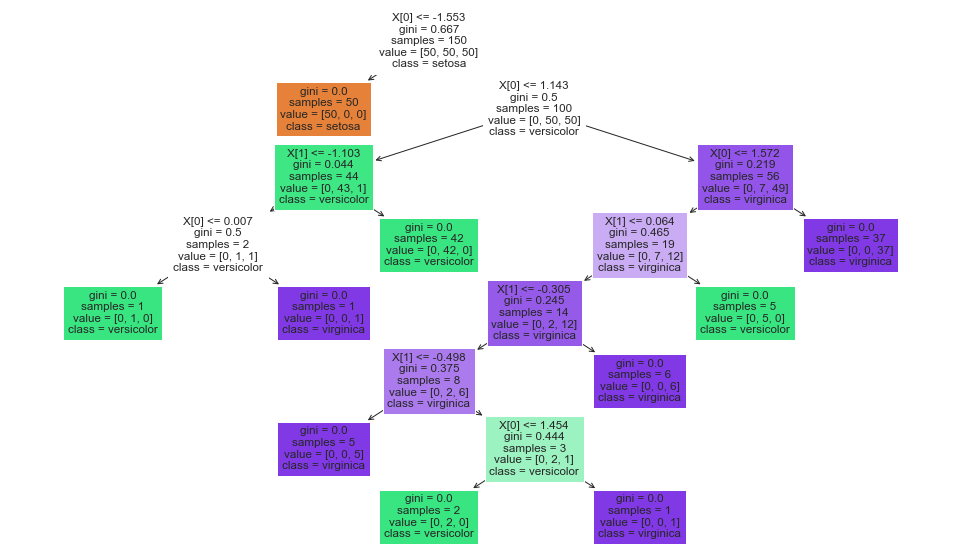

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier().fit(X_r, y)
plt.figure(figsize=(17, 10))

plot = tree.plot_tree(dt, filled=True, class_names=target_names)
plt.plot()


# Baseline

Baseline means a hyperparameter tuned random forest on a cleaned dataset.

Hyperparameter grid used with 5 times cross validation:

```python
{
    "max_depth": [6, None],
    "n_estimators": [50, 100, 200],
    "max_features": ["sqrt", "log2"],
    "n_jobs": [-1],
    "class_weight": ["balanced", None],
    "random_state": [1, 42, 1337]
}
```

All datasets are preprocessed with the following steps:
- impute NaN values (numerical data with mean value, categorical data with "missing")
- one hot encode
- standard scale
- label encode
- shuffle data
- hybrid feature selection to select the best up to 100 features (boruta, select from model and Recursive feature elimination with cross-validation)

# PCA and Kernel PCA (KPCA) Features

Both feature types are generated on all features before feature selection. For PCA and KPCA n_components is set to 2.
[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) uses the default settings of sklearn. [KPCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA) uses the "rbf" kernel and the "randomized" eigen_solver.

# UMAP Features

[UMAP](https://umap-learn.readthedocs.io/en/latest/api.html) runs with default settings besides n_components=2, n_neighbors=100. For the fit only X_train was used even though UMAP can use the target information to be more precise, it's not used because of overfitting.

# KMEANS Features

[KMEANS]("https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html") runs with default settings. n_clusters is bruteforeced in range(2, 11) the best n is selected by silhouette score. For performance reason Mini-Batch K-Means clustering is used.

# Performance baseline vs baseline with PCA features


In [69]:
df = pd.read_feather(RESULTS_FILE_PATH).\
    sort_values(by="pca_clean_test_score_change_to_baseline", ascending=True).\
    reset_index(drop=True)

select_columns = ["dataset_id", "baseline_test_score", "pca_clean_test_score", "pca_clean_test_score_change_to_baseline"]
df[select_columns]


,dataset_id,baseline_test_score,pca_clean_test_score,pca_clean_test_score_change_to_baseline
0,469,0.217712,0.180812,-16.949153
1,40975,0.959184,0.926871,-3.368794
2,37,0.740458,0.717557,-3.092784
3,22,0.791176,0.767647,-2.973978
4,54,0.763889,0.743056,-2.727273
5,18,0.722059,0.702941,-2.647658
6,6332,0.739130,0.722826,-2.205882
7,1464,0.827451,0.815686,-1.421801
8,40966,0.991848,0.978261,-1.369863
9,31,0.708824,0.700000,-1.244813


In [70]:
n_improved_datasets = sum(df["pca_clean_test_score_change_to_baseline"] > 0)
n_total_datasets = len(df)


In [71]:
print(f"The accuracy was improved in {n_improved_datasets} of {n_total_datasets} datasets ({n_improved_datasets / n_total_datasets * 100}%)")

The accuracy was improved in 36 of 72 datasets (50.0%)


<AxesSubplot:ylabel='dataset_id'>

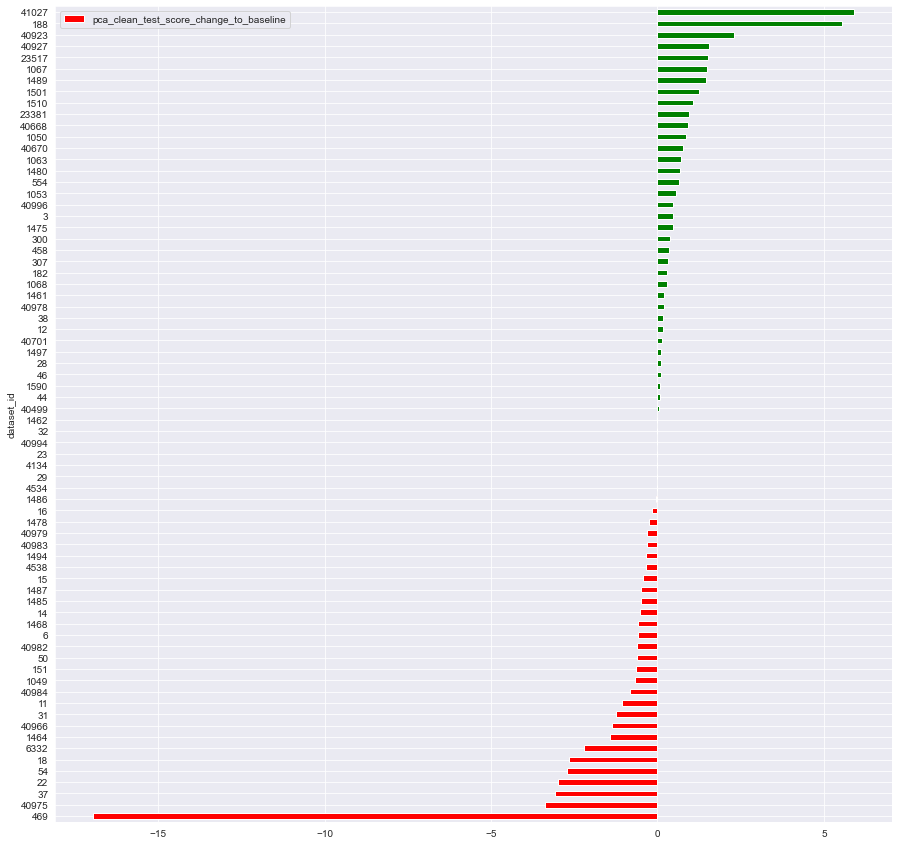

In [72]:
df.plot.\
    barh(
        x="dataset_id",
        y="pca_clean_test_score_change_to_baseline",
        color=(df["pca_clean_test_score_change_to_baseline"] > 0).map({True: 'g', False: 'r'}),
        figsize=(15, 15)
    )


# Performance baseline vs baseline with Kernel PCA features


In [73]:
df = pd.read_feather(RESULTS_FILE_PATH).\
    sort_values(by="kpca_clean_test_score_change_to_baseline", ascending=True).\
    reset_index(drop=True)

select_columns = ["dataset_id", "baseline_test_score", "kpca_clean_test_score", "kpca_clean_test_score_change_to_baseline"]
df[select_columns]

,dataset_id,baseline_test_score,kpca_clean_test_score,kpca_clean_test_score_change_to_baseline
0,469,0.217712,0.173432,-20.338983
1,23381,0.623529,0.582353,-6.603774
2,54,0.763889,0.729167,-4.545455
3,1480,0.733668,0.703518,-4.109589
4,11,0.873239,0.854460,-2.150538
5,40975,0.959184,0.938776,-2.127660
6,23,0.538922,0.528942,-1.851852
7,18,0.722059,0.710294,-1.629328
8,40966,0.991848,0.980978,-1.095890
9,50,0.993865,0.984663,-0.925926


In [74]:
n_improved_datasets = sum(df["kpca_clean_test_score_change_to_baseline"] > 0)
n_total_datasets = len(df)

In [75]:
print(f"The accuracy was improved in {n_improved_datasets} of {n_total_datasets} datasets ({n_improved_datasets / n_total_datasets * 100}%)")

The accuracy was improved in 38 of 72 datasets (52.77777777777778%)


<AxesSubplot:ylabel='dataset_id'>

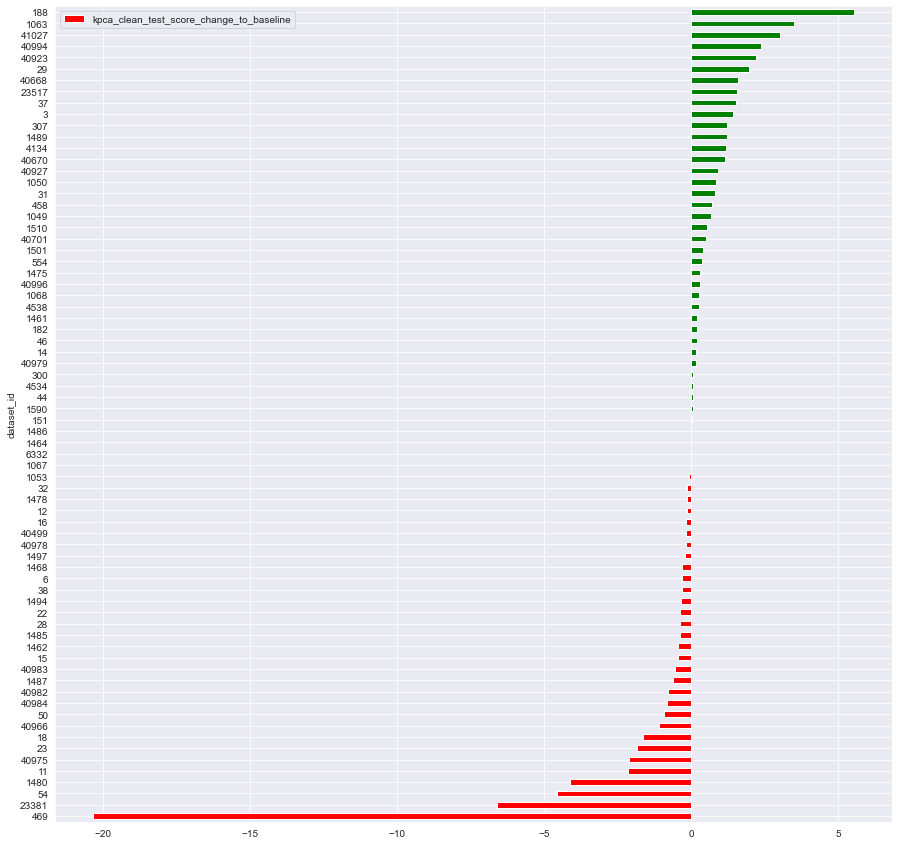

In [76]:
df.plot.\
    barh(
        x="dataset_id",
        y="kpca_clean_test_score_change_to_baseline",
        color=(df["kpca_clean_test_score_change_to_baseline"] > 0).map({True: 'g', False: 'r'}),
        figsize=(15, 15)
    )

# Performance baseline vs baseline with UMAP features

In [77]:
df = pd.read_feather(RESULTS_FILE_PATH).\
    sort_values(by="umap_clean_test_score_change_to_baseline", ascending=True).\
    reset_index(drop=True)

select_columns = ["dataset_id", "baseline_test_score", "umap_clean_test_score", "umap_clean_test_score_change_to_baseline"]
df[select_columns]

,dataset_id,baseline_test_score,umap_clean_test_score,umap_clean_test_score_change_to_baseline
0,469,0.217712,0.166052,-23.728814
1,23381,0.623529,0.576471,-7.547170
2,50,0.993865,0.923313,-7.098765
3,1468,0.915761,0.864130,-5.637982
4,1480,0.733668,0.698492,-4.794521
5,54,0.763889,0.732639,-4.090909
6,40975,0.959184,0.921769,-3.900709
7,11,0.873239,0.849765,-2.688172
8,22,0.791176,0.772059,-2.416357
9,14,0.852941,0.838235,-1.724138


In [78]:
n_improved_datasets = sum(df["umap_clean_test_score_change_to_baseline"] > 0)
n_total_datasets = len(df)

In [79]:
print(f"The accuracy was improved in {n_improved_datasets} of {n_total_datasets} datasets ({n_improved_datasets / n_total_datasets * 100}%)")

The accuracy was improved in 28 of 72 datasets (38.88888888888889%)


<AxesSubplot:ylabel='dataset_id'>

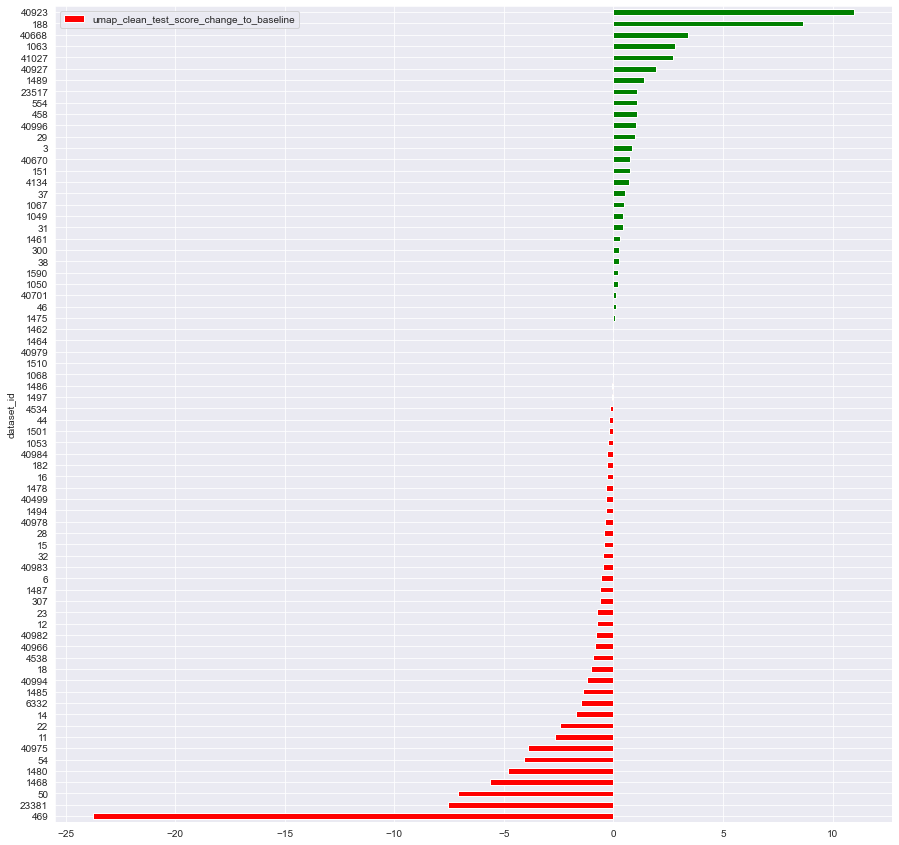

In [80]:
df.plot.\
    barh(
        x="dataset_id",
        y="umap_clean_test_score_change_to_baseline",
        color=(df["umap_clean_test_score_change_to_baseline"] > 0).map({True: 'g', False: 'r'}),
        figsize=(15, 15)
    )

# Performance baseline vs baseline with KMEANS features

In [81]:
df = pd.read_feather(RESULTS_FILE_PATH).\
    sort_values(by="kmeans_clean_test_score_change_to_baseline", ascending=True).\
    reset_index(drop=True)

select_columns = ["dataset_id", "baseline_test_score", "kmeans_clean_test_score", "kmeans_clean_test_score_change_to_baseline"]
df[select_columns]

,dataset_id,baseline_test_score,kmeans_clean_test_score,kmeans_clean_test_score_change_to_baseline
0,469,0.217712,0.173432,-20.338983
1,23381,0.623529,0.588235,-5.660377
2,1480,0.733668,0.708543,-3.424658
3,40975,0.959184,0.933673,-2.659574
4,54,0.763889,0.746528,-2.272727
5,41027,0.794409,0.782072,-1.552949
6,29,0.868085,0.855319,-1.470588
7,1464,0.827451,0.815686,-1.421801
8,18,0.722059,0.714706,-1.018330
9,1485,0.889140,0.881222,-0.890585


In [82]:
n_improved_datasets = sum(df["kmeans_clean_test_score_change_to_baseline"] > 0)
n_total_datasets = len(df)

In [83]:
print(f"The accuracy was improved in {n_improved_datasets} of {n_total_datasets} datasets ({n_improved_datasets / n_total_datasets * 100}%)")


The accuracy was improved in 31 of 72 datasets (43.05555555555556%)


<AxesSubplot:ylabel='dataset_id'>

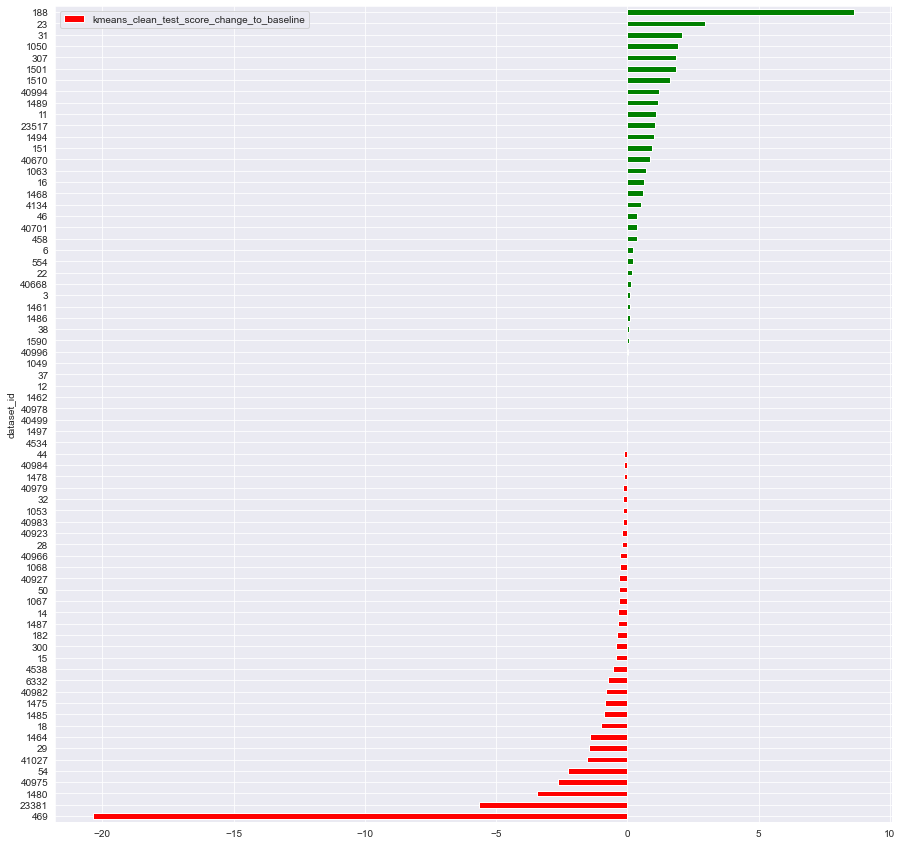

In [84]:
df.plot.\
    barh(
        x="dataset_id",
        y="kmeans_clean_test_score_change_to_baseline",
        color=(df["kmeans_clean_test_score_change_to_baseline"] > 0).map({True: 'g', False: 'r'}),
        figsize=(15, 15)
    )

## set a dataset you want to use

In [85]:
#dataset_id = "40978"  # 2 classes, ~3k features
#dataset_id = "3"  # 2 classes, 73 features
dataset_id = "1486"  # 2 classes, 174 features
#dataset_id = "41027"  # 3 classes, 6 features


n_head = 1000000000

In [86]:
colors = {0:'red', 1:'black', 2:'blue'}

# Plot PCA Features against target


X shape: (34465, 174)
target classes: 
1    24621
0     9844
Name: y, dtype: int64


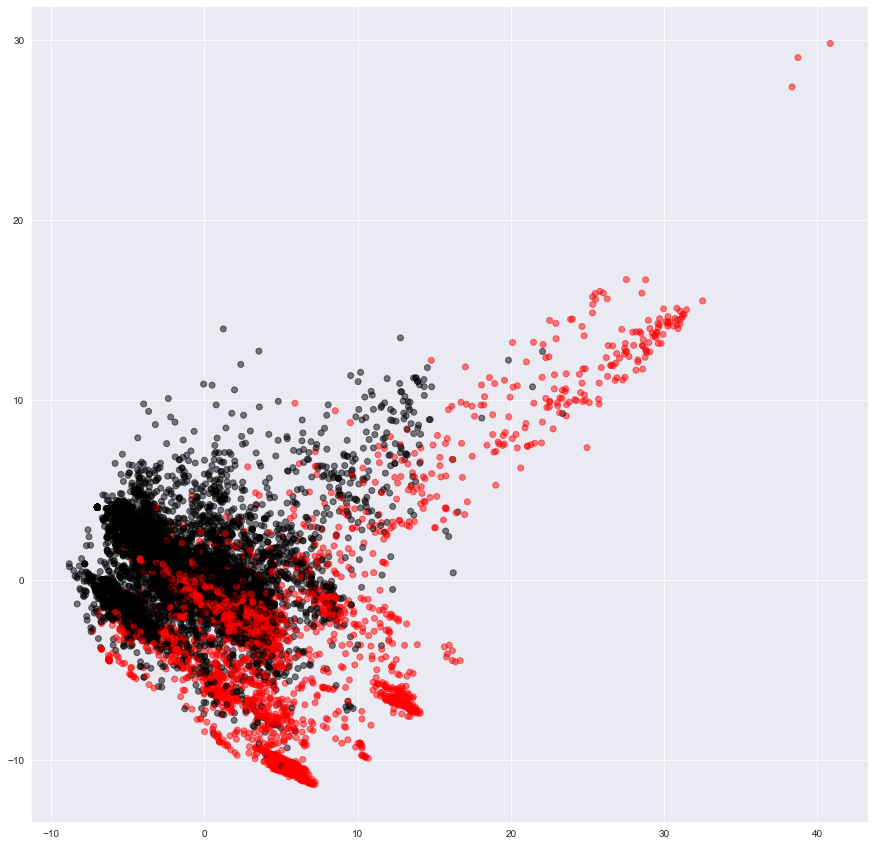

In [87]:
# load data
df_pca_test = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, X_TEST_CLEAN_PCA_FILE_NAME))
X = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, X_CLEAN_FILE_NAME))
y = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, Y_FILE_NAME))["y"]

# short feedback of the data and classes
print(f"X shape: {X.shape}")
print(f"target classes: \n{y.value_counts()}")

# split according to the split from training
_, _, _, y_test = train_test_split(X, y, train_size=TRAIN_TEST_SPLIT_TRAIN_SIZE, random_state=RANDOM_STATE)

# reset index
y_test.reset_index(drop=True, inplace=True)

# concat
df_pca_test["y"] = y_test.reset_index(drop=True)

# make a plot
plot_x = df_pca_test["pca_0"].head(n_head)
plot_y = df_pca_test["pca_1"].head(n_head)
plot_c = df_pca_test["y"].head(n_head)

plt.figure(figsize = (15,15))
plt.scatter(x=plot_x, y=plot_y, c=plot_c.map(colors), alpha=0.5)

# set ranges to the axis if needed
# plt.xlim([-2, 2])
# plt.ylim([-5, 5])




# Plot Kernel PCA Features against target

X shape: (34465, 174)
target classes: 
1    24621
0     9844
Name: y, dtype: int64


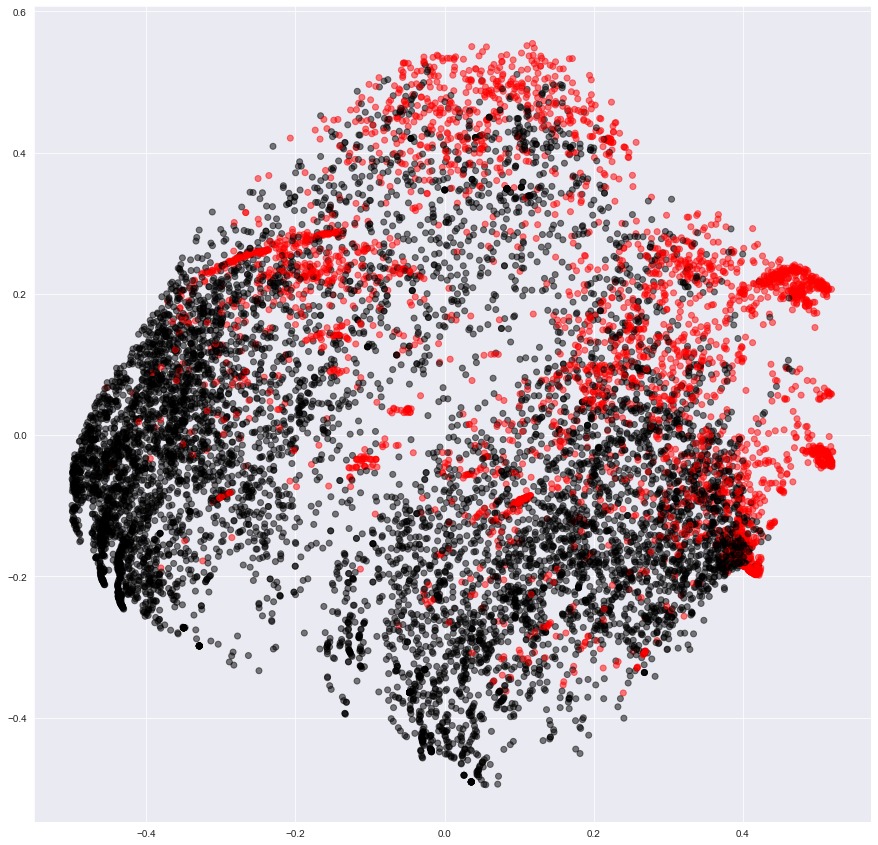

In [88]:
# load data
df_pca_test = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, X_TEST_CLEAN_KPCA_FILE_NAME))
X = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, X_CLEAN_FILE_NAME))
y = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, Y_FILE_NAME))["y"]

# short feedback of the data and classes
print(f"X shape: {X.shape}")
print(f"target classes: \n{y.value_counts()}")

# split according to the split from training
_, _, _, y_test = train_test_split(X, y, train_size=TRAIN_TEST_SPLIT_TRAIN_SIZE, random_state=RANDOM_STATE)

# reset index
y_test.reset_index(drop=True, inplace=True)

# concat
df_pca_test["y"] = y_test.reset_index(drop=True)

# make a plot
plot_x = df_pca_test["kpca_0"].head(n_head)
plot_y = df_pca_test["kpca_1"].head(n_head)
plot_c = df_pca_test["y"].head(n_head)

plt.figure(figsize = (15,15))
plt.scatter(x=plot_x, y=plot_y, c=plot_c.map(colors), alpha=0.5)

# set ranges to the axis if needed
# plt.xlim([-1, 1])
# plt.ylim([-1, 1])


# Plot UMAP Features against target

X shape: (34465, 174)
target classes: 
1    24621
0     9844
Name: y, dtype: int64


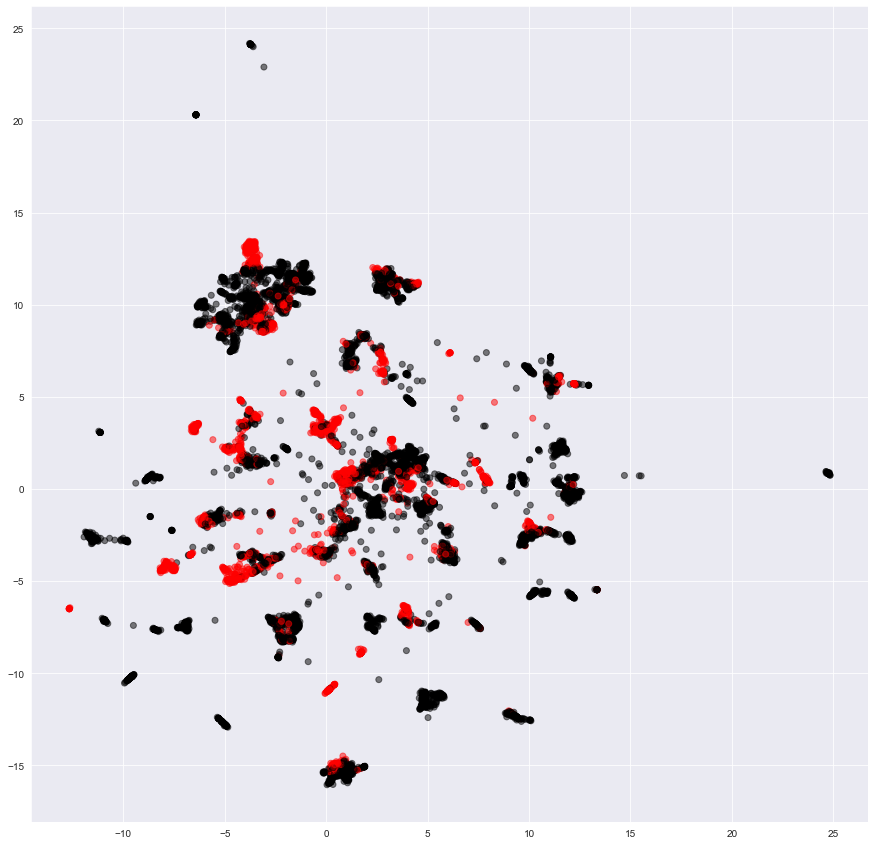

In [89]:
# load data
df_umap_test = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, X_TEST_CLEAN_UMAP_FILE_NAME))
X = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, X_CLEAN_FILE_NAME))
y = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, Y_FILE_NAME))["y"]

# short feedback of the data and classes
print(f"X shape: {X.shape}")
print(f"target classes: \n{y.value_counts()}")

# split according to the split from training
_, _, _, y_test = train_test_split(X, y, train_size=TRAIN_TEST_SPLIT_TRAIN_SIZE, random_state=RANDOM_STATE)

# reset index
y_test.reset_index(drop=True, inplace=True)

# concat
df_umap_test["y"] = y_test.reset_index(drop=True)

# make a plot
plot_x = df_umap_test["umap_0"].head(n_head)
plot_y = df_umap_test["umap_1"].head(n_head)
plot_c = df_umap_test["y"].head(n_head)

plt.figure(figsize = (15,15))
plt.scatter(x=plot_x, y=plot_y, c=plot_c.map(colors), alpha=0.5)

# set ranges to the axis if needed
# plt.xlim([-2, 2])
# plt.ylim([-5, 5])

# Plot KMEANS Features against target

Can not plot 1d data.

In [90]:
# load data
kmeans_test = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, "kmeans_test_clean.feather"))
y = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, Y_FILE_NAME))["y"]

kmeans_test["y"] = y
kmeans_test["kmeans_cluster_equals_target"] = kmeans_test["kmeans_0"] == kmeans_test["y"]

In [91]:
print(f"kmeans cluster and the target are the same @{round(kmeans_test['kmeans_cluster_equals_target'].sum() / len(kmeans_test) * 100, 2)}%")

kmeans cluster and the target are the same @57.25%


# Results Dataframe

In [92]:
df = pd.read_feather(RESULTS_FILE_PATH)

In [93]:
df

,dataset_id,dataset_name,task_id,n_classes,n_features,n_samples,n_features_ohe,n_features_filtered,baseline_train_cv_score,baseline_test_score,pca_clean_train_cv_score,pca_clean_test_score,kpca_clean_train_cv_score,kpca_clean_test_score,umap_clean_train_cv_score,umap_clean_test_score,kmeans_clean_train_cv_score,kmeans_clean_test_score,pca_kpca_umap_kmeans_clean_train_cv_score,pca_kpca_umap_kmeans_clean_test_score,pca_clean_train_score > baseline_train_score,pca_clean_test_score > baseline_test_score,pca_clean_test_score_change_to_baseline,kpca_clean_train_score > baseline_train_score,kpca_clean_test_score > baseline_test_score,kpca_clean_test_score_change_to_baseline,umap_clean_train_score > baseline_train_score,umap_clean_test_score > baseline_test_score,umap_clean_test_score_change_to_baseline,kmeans_clean_train_score > baseline_train_score,kmeans_clean_test_score > baseline_test_score,kmeans_clean_test_score_change_to_baseline,pca_kpca_umap_kmeans_clean_train_score > baseline_train_score,pca_kpca_umap_kmeans_clean_test_score > baseline_test_score,pca_kpca_umap_kmeans_clean_test_score_change_to_baseline,model_hyperparameter_baseline_random_forest,model_hyperparameter_pca_clean_random_forest,model_hyperparameter_kpca_clean_random_forest,model_hyperparameter_umap_clean_random_forest,model_hyperparameter_kmeans_clean_random_forest,model_hyperparameter_pca_kpca_umap_kmeans_clean_random_forest,pca_clean_filtered_train_cv_score,pca_clean_filtered_test_score,kpca_clean_filtered_train_cv_score,kpca_clean_filtered_test_score,umap_clean_filtered_train_cv_score,umap_clean_filtered_test_score,kmeans_clean_filtered_train_cv_score,kmeans_clean_filtered_test_score,pca_kpca_umap_kmeans_clean_filtered_train_cv_score,pca_kpca_umap_kmeans_clean_filtered_test_score,pca_clean_filtered_train_score > baseline_train_score,pca_clean_filtered_test_score > baseline_test_score,pca_clean_filtered_test_score_change_to_baseline,kpca_clean_filtered_train_score > baseline_train_score,kpca_clean_filtered_test_score > baseline_test_score,kpca_clean_filtered_test_score_change_to_baseline,umap_clean_filtered_train_score > baseline_train_score,umap_clean_filtered_test_score > baseline_test_score,umap_clean_filtered_test_score_change_to_baseline,kmeans_clean_filtered_train_score > baseline_train_score,kmeans_clean_filtered_test_score > baseline_test_score,kmeans_clean_filtered_test_score_change_to_baseline,pca_kpca_umap_kmeans_clean_filtered_train_score > baseline_train_score,pca_kpca_umap_kmeans_clean_filtered_test_score > baseline_test_score,pca_kpca_umap_kmeans_clean_filtered_test_score_change_to_baseline,model_hyperparameter_pca_clean_filtered_random_forest,model_hyperparameter_kpca_clean_filtered_random_forest,model_hyperparameter_umap_clean_filtered_random_forest,model_hyperparameter_kmeans_clean_filtered_random_forest,model_hyperparameter_pca_kpca_umap_kmeans_clean_filtered_random_forest,any_feature_type_clean_test_score > baseline_test_score,any_feature_type_clean_filtered_test_score > baseline_test_score
0,3,kr-vs-kp,3,2,36,3196,73,60,0.985299,0.976081,0.985773,0.980681,0.990989,0.989880,0.993360,0.984361,0.984351,0.977001,0.990990,0.989880,True,True,0.471254,True,True,1.413761,True,True,0.848256,False,True,0.094251,True,True,1.413761,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 1337, 'verbose': 0, 'warm_start': False}","{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'rand

In [94]:
# for column in df.columns:
#     print(column)

In [95]:
correlation = df[
    ['pca_clean_test_score > baseline_test_score',
     'kpca_clean_test_score > baseline_test_score',
     'umap_clean_test_score > baseline_test_score',
     'kmeans_clean_test_score > baseline_test_score',
     "pca_kpca_umap_kmeans_clean_test_score > baseline_test_score"
     ]
].corr()
correlation.style.background_gradient(cmap='coolwarm').format(precision=2)


,pca_clean_test_score > baseline_test_score,kpca_clean_test_score > baseline_test_score,umap_clean_test_score > baseline_test_score,kmeans_clean_test_score > baseline_test_score,pca_kpca_umap_kmeans_clean_test_score > baseline_test_score
pca_clean_test_score > baseline_test_score,1.00,0.39,0.46,0.20,0.51
kpca_clean_test_score > baseline_test_score,0.39,1.00,0.64,0.37,0.53
umap_clean_test_score > baseline_test_score,0.46,0.64,1.00,0.40,0.68
kmeans_clean_test_score > baseline_test_score,0.20,0.37,0.40,1.00,0.43
pca_kpca_umap_kmeans_clean_test_score > baseline_test_score,0.51,0.53,0.68,0.43,1.00


In [96]:
print(f"improved {df['any_feature_type_clean_test_score > baseline_test_score'].sum()} out of {len(df)} datasets = {round(df['any_feature_type_clean_test_score > baseline_test_score'].sum() / len(df) * 100, 2)}%")

improved 55 out of 72 datasets = 76.39%
